# S03 T02: Visualització gràfica de Múltiples variables
## Luis Pardina - Data Science - 12/abril/2022
### *Exercici 2* : Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, *movies.dat*

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La taula *movies.dat* conté files amb tres camps d'informació separats per "::": un numero identificador, el títol d'un film i l'any de producció, i els generes als quals pertany el film. Els generes estan separats per una barra vertical "|". La llista no té encapçalat.

Primer genero una llista amb l'encapçalat de cada columna del dataframe:

In [2]:
head_names = ['movie_id', 'title', 'genre']
head_names

['movie_id', 'title', 'genre']

Després genero un DataFrame amb el contingut de la taula:

In [3]:
movies = pd.read_table('movies.dat', sep = '::', header = None, names = head_names, encoding='latin-1', engine='python')
movies.head(10)

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


La taula conté 3883 registres:

In [4]:
movies.shape

(3883, 3)

Genero una nova columna que contingui l'any de produccio de la pel.lícula com un numero sencer. Després retallo l'any de producció de la columna del títol per a que no hi hagi una informació redundant:

In [5]:
movies['year'] = movies.title.str.slice(-5, -1).astype(int)
movies['title'] = movies.title.str.slice(0,-7)

In [6]:
movies.head(10)

,movie_id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children's,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action|Adventure|Thriller,1995


In [7]:
movies.tail(10)

,movie_id,title,genre,year
3873,3943,Bamboozled,Comedy,2000
3874,3944,Bootmen,Comedy|Drama,2000
3875,3945,Digimon: The Movie,Adventure|Animation|Children's,2000
3876,3946,Get Carter,Action|Drama|Thriller,2000
3877,3947,Get Carter,Thriller,1971
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000
3882,3952,"Contender, The",Drama|Thriller,2000


Presento un histograma per a visualitzar l'any de producció dels films. La llista arriba només fins l'any 2000, i la major part de films son de la darrera dècada del segle passat:

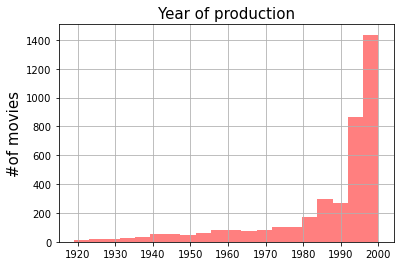

In [8]:
movies.hist(['year'], bins=20, color = "Red", alpha=0.5)
plt.title('Year of production', fontsize=15)
plt.ylabel('#of movies', fontsize = 15);

Genero una llista dels gèneres de cada film fent un recorregut amb un bucle for per la columna 'genero' del dataframe. A més a més quan el camp conté varios gèneres els separo:

In [9]:
all_genres = []
for x in movies.genre:
    all_genres.extend(x.split('|'))

In [10]:
type(all_genres)

list

In [11]:
len(all_genres)

6408

Genero una matriu amb la llista dels valors únics dels gèneres dels films amb la funció unique():

In [12]:
genres_list = pd.unique(all_genres)
genres_list

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [13]:
len(genres_list)

18

In [14]:
type(genres_list)

numpy.ndarray

Ara genero una matriu de zeros que té tantes columnes com valors unics de genere, i tantes files com films:

In [20]:
zero_matrix = np.zeros((len(movies), len(genres_list)))
zero_matrix.shape

(3883, 18)

La transformem en un DataFrame que tingui com nom de les columnes els gèneres dels films:

In [21]:
dummies = pd.DataFrame(zero_matrix, columns = genres_list)
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I ara fent un recorregut pel dataframe de movies i hi afegim un 1 al dataframe de dummies al generes corresponents:

In [22]:
for i, gen in enumerate(movies.genre):
    indexes = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indexes] = 1

In [23]:
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Presento un recompte dels diferents gèneres. El més habituals son 'drama' i 'comèdia':

In [24]:
dummies.sum()

Animation       105.0
Children's      251.0
Comedy         1200.0
Adventure       283.0
Fantasy          68.0
Romance         471.0
Drama          1603.0
Action          503.0
Crime           211.0
Thriller        492.0
Horror          343.0
Sci-Fi          276.0
Documentary     127.0
War             143.0
Musical         114.0
Mystery         106.0
Film-Noir        44.0
Western          68.0
dtype: float64

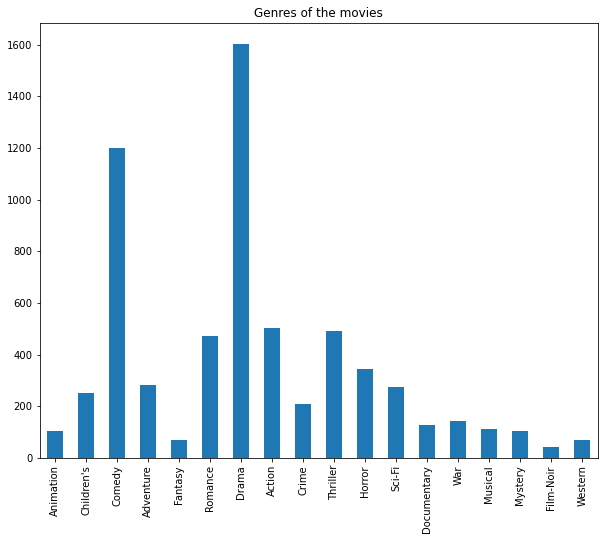

In [25]:
dummies.sum().plot(kind='bar', fontsize=10, title = 'Genres of the movies', figsize=(10,8));

Ara per a acabar hi juntarem la dataframe de dummies a la de movies:

In [26]:
movies_dummies = movies.join(dummies.add_prefix('Genre_'))
movies_dummies.head()

,movie_id,title,genre,year,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story,Animation|Children's|Comedy,1995,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,Comedy|Romance,1995,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,Comedy|Drama,1995,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,Comedy,1995,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
movies_dummies.dtypes

movie_id               int64
title                 object
genre                 object
year                   int32
Genre_Animation      float64
Genre_Children's     float64
Genre_Comedy         float64
Genre_Adventure      float64
Genre_Fantasy        float64
Genre_Romance        float64
Genre_Drama          float64
Genre_Action         float64
Genre_Crime          float64
Genre_Thriller       float64
Genre_Horror         float64
Genre_Sci-Fi         float64
Genre_Documentary    float64
Genre_War            float64
Genre_Musical        float64
Genre_Mystery        float64
Genre_Film-Noir      float64
Genre_Western        float64
dtype: object